Задачи

1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
2. Какой клиент совершил больше всего успешных операций?
3. С какой платформы осуществляется наибольшее количество успешных операций?
4. Какую платформу предпочитают премиумные клиенты?
5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента
6. Постройте график распределения числа успешных операций
7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. Клиенты какого возраста совершили наибольшее количество успешных действий?
 

Описание данных \

user_data: \
client – идентификатор пользователя \
premium – является ли клиент премиум \
age – возраст

logs:
client – идентификатор пользователя \
success – результат (успех - 1, нет - 0) \
platform – платформа \
time – время в формате Unix

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [112]:
# Установка настройки графика по умолчанию
sns.set(
    font_scale=1, # размер шрифта
    style='whitegrid', # вид графика
    rc={'figure.figsize':(20, 10)}) # размер графика

1. Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. \
Вопрос: Сколько уникальных значений принимает переменная platform?

In [14]:
user_data = pd.read_csv('./user_data.csv')
user_data.head()

client  premium  age
0   46346    False   58
1    4391    False   55
2   27372    False   64
3   11989    False   44
4   60664    False   49

In [15]:
logs = pd.read_csv('./logs.csv')
logs.head()

client  success  platform        time
0   40177     True     phone  1585412212
1   61468     True     phone  1585425658
2   35604    False     phone  1585459894
3    9961     True     phone  1585400189
4   10931     True  computer  1585468629

In [6]:
user_data.shape

(2954, 3)

In [9]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [10]:
user_data.describe()

client          age
count   2954.000000  2954.000000
mean   50767.886594    44.196005
std    28800.505847    14.248336
min       40.000000    20.000000
25%    25639.500000    32.000000
50%    51569.500000    44.000000
75%    75963.250000    56.000000
max    99973.000000    69.000000

In [18]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [11]:
logs.shape

(4500, 4)

In [12]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [13]:
logs.describe()

client          time
count   4500.000000  4.500000e+03
mean   50998.758000  1.585440e+09
std    28374.472495  2.314866e+04
min       40.000000  1.585400e+09
25%    27056.500000  1.585420e+09
50%    52659.000000  1.585440e+09
75%    76001.250000  1.585461e+09
max    99993.000000  1.585480e+09

In [19]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [16]:
logs.platform.nunique()

3

2. Какой клиент совершил больше всего успешных операций?

In [20]:
logs.head()

client  success  platform        time
0   40177     True     phone  1585412212
1   61468     True     phone  1585425658
2   35604    False     phone  1585459894
3    9961     True     phone  1585400189
4   10931     True  computer  1585468629

In [30]:
cnt_of_client = logs.query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'platform': 'count'}) \
    .rename(columns={'platform': 'cnt'}) \
    .sort_values('cnt', ascending=False)

In [31]:
cnt_of_client.head()

client  cnt
332    12179   41
1758   61468   41
1487   52870   41
1759   61473   41
2626   92584   41

In [42]:
best_client = cnt_of_client.query('cnt == 41').sort_values('client')

In [43]:
best_client.client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

3. С какой платформы осуществляется наибольшее количество успешных операций?

In [54]:
logs.query('success == True').platform.value_counts().idxmax()

'phone'

4. Какую платформу предпочитают премиумные клиенты?

In [62]:
all_df = logs.merge(user_data, on='client')
all_df

client  success  platform        time  premium  age
0      61468     True     phone  1585425658    False   25
1      61468     True  computer  1585460504    False   25
2      61468     True  computer  1585430291    False   25
3      61468     True  computer  1585444317    False   25
4      61468     True     phone  1585441266    False   25
...      ...      ...       ...         ...      ...  ...
3434   62438    False     phone  1585479041    False   36
3435   95152     True  computer  1585420263    False   67
3436   64496    False  computer  1585459072    False   66
3437    8967     True     phone  1585465121    False   33
3438   40921     True     phone  1585437692    False   45

[3439 rows x 6 columns]

In [61]:
all_df.query('premium == True').platform.value_counts().idxmax()

'phone'

5. Визуализируйте распределение возраста клиентов в зависимости от типа клиента

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

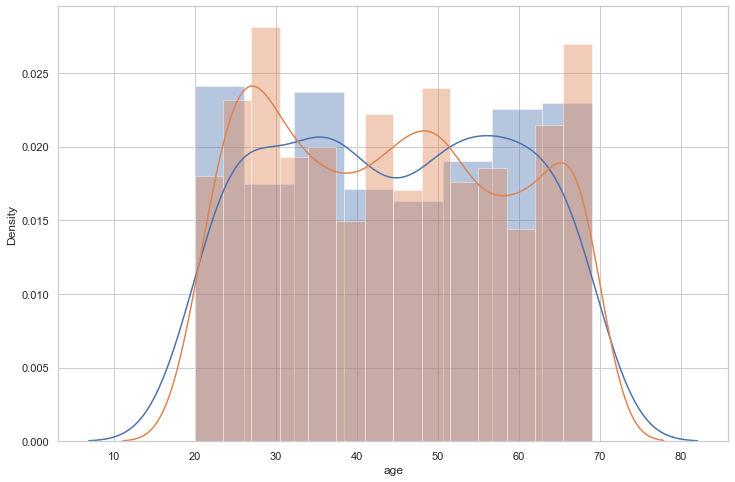

In [113]:
plt.figure(figsize=(12,8))
sns.distplot(all_df.query('premium == True').age)
sns.distplot(all_df.query('premium == False').age)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

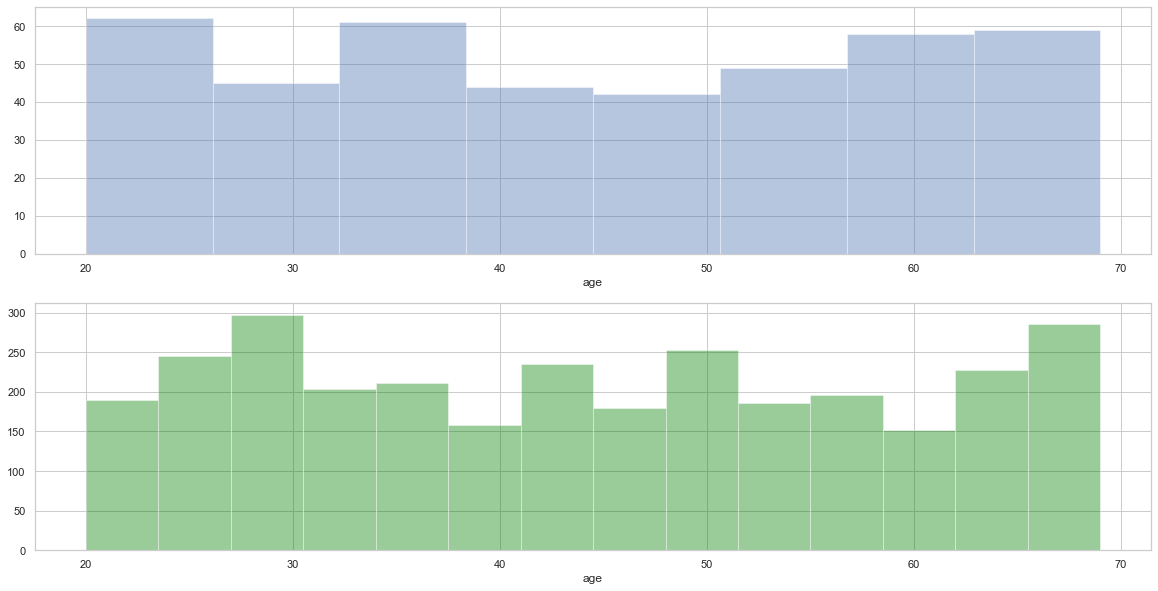

In [114]:
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.distplot(all_df.query('premium == True').age, ax=ax[0], kde=False)
sns.distplot(all_df.query('premium == False').age, ax=ax[1], kde=False, color='green')

6. Постройте график распределения числа успешных операций

In [105]:
success_cl = all_df.groupby('client').agg({'success': 'sum'})

<AxesSubplot:>

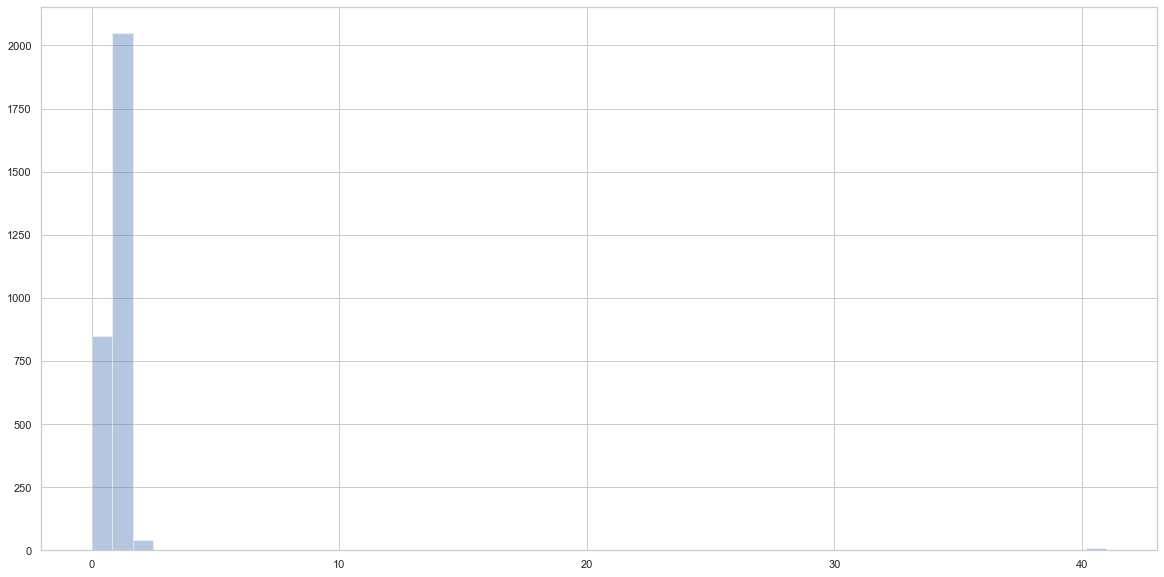

In [115]:
sns.distplot(success_cl, kde=False)

In [92]:
success_cl.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

7. Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. Клиенты какого возраста совершили наибольшее количество успешных действий?

In [93]:
all_df.query('platform == "computer" and success == True').age

client  success  platform        time  premium  age
0   61468     True     phone  1585425658    False   25
1   61468     True  computer  1585460504    False   25
2   61468     True  computer  1585430291    False   25
3   61468     True  computer  1585444317    False   25
4   61468     True     phone  1585441266    False   25

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

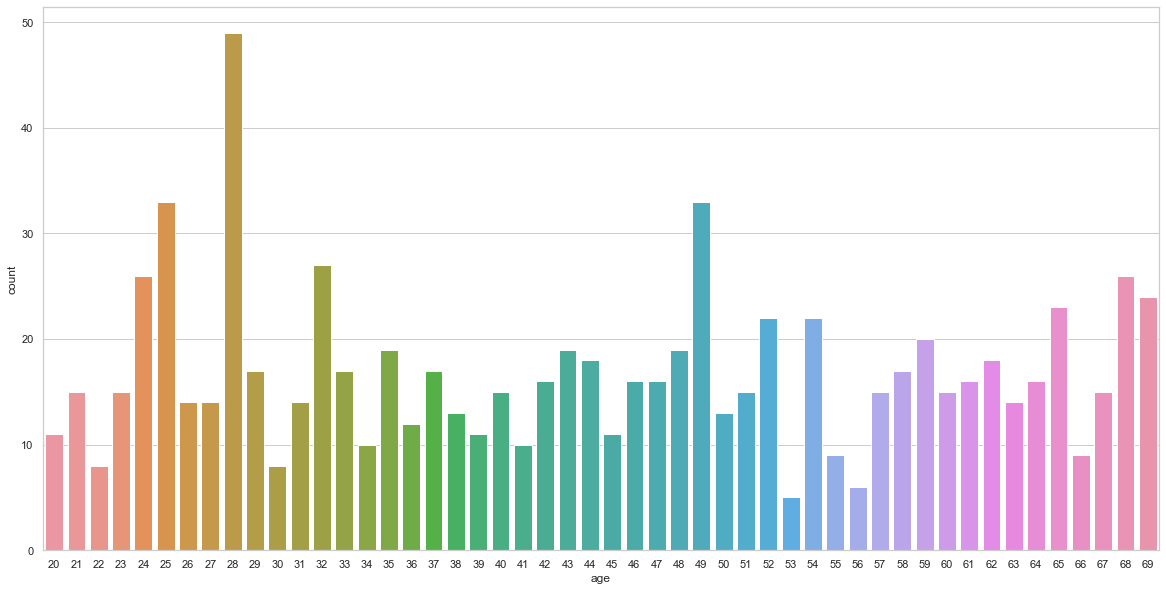

In [117]:
sns.countplot(all_df.query('platform == "computer" and success == True').age)